In [1]:
!pip install datasets

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 491.2/491.2 kB 5.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 5.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 183.9/183.9 kB 8.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 143.5/143.5 kB 7.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.8/194.8 kB 8.5 MB/s eta 0:00:00
  Attempting uninstall: fsspec
    Found existing installation: fsspec 2025.3.2
    Uninstalling fsspec-2025.3.2:
      Successfully uninstalled fsspec-2025.3.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
torch 2.6.0+cu124 requires nvidia-cublas-cu12==12.4.5.8; platform_system == "Linux" and platform_machine == "x86_64", but you have nvidia-cublas-cu12 12.5.3.2 which is incompatible.
torch 2.6.0+cu124 requires nvidia-cuda-cupti-cu12==12.4.127; platform_system == "L

# **Importing the DataSet**

In [2]:
# Importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datasets import load_dataset
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier
import time
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score, roc_auc_score,
    classification_report, confusion_matrix, ConfusionMatrixDisplay, RocCurveDisplay
)
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv1D, MaxPooling1D, Flatten, LSTM, GRU, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping
import sklearn.metrics as metrics
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score



In [3]:
# Loading the dataset from Hugging Face
dataset = load_dataset("tanzuhuggingface/creditcardfraudtraining")

/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


README.md:   0%|          | 0.00/182 [00:00<?, ?B/s]

credit_card_resampled.csv:   0%|          | 0.00/163M [00:00<?, ?B/s]

Generating train split:   0%|          | 0/2085138 [00:00<?, ? examples/s]

In [4]:
df = pd.DataFrame(dataset['train'])

In [5]:
# Display the first few rows of the DataFrame
df.head()  # This helps in understanding the structure and sample data of the DataFrame

,id,index,time_elapsed,cc_num,amt,lat,long,is_fraud
0,0,347210,1,4.158950e+15,3.34,40.4308,-79.9205,0
1,1,347244,1,4.797300e+18,16.54,38.8938,-86.5246,0
2,2,347249,1,4.586810e+15,29.84,32.5486,-80.3070,0
3,3,347278,1,4.956830e+18,101.56,40.6747,-74.2239,0
4,4,347293,2,4.561550e+12,3.59,34.9889,-106.0610,0


In [6]:
# Display summary information about the DataFrame
df.info()  # Provides an overview of the dataset, including column names, data types, and non-null values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2085138 entries, 0 to 2085137
Data columns (total 8 columns):
 #   Column        Dtype  
---  ------        -----  
 0   id            int64  
 1   index         int64  
 2   time_elapsed  int64  
 3   cc_num        float64
 4   amt           float64
 5   lat           float64
 6   long          float64
 7   is_fraud      int64  
dtypes: float64(4), int64(4)
memory usage: 127.3 MB


In [7]:
# Count the occurrences of each unique value in the "is_fraud" column
df["is_fraud"].value_counts()  # Helps in understanding the class distribution (fraud vs. non-fraud cases)

,count
is_fraud,
0,1042569
1,1042569


In [8]:
#Checking for missing values in the dataset
df.isnull().sum()  # Displays the count of missing values for each column

,0
id,0
index,0
time_elapsed,0
cc_num,0
amt,0
lat,0
long,0
is_fraud,0


In [9]:
# Display basic statistical summary of the dataset

df.describe()  # Provides statistics like mean, standard deviation, min, max, and quartiles for numerical columns

,id,index,time_elapsed,cc_num,amt,lat,long,is_fraud
count,2.085138e+06,2.085138e+06,2.085138e+06,2.085138e+06,2.085138e+06,2.085138e+06,2.085138e+06,2085138.0
mean,1.042568e+06,5.049692e+05,1.169697e+00,3.965088e+17,2.992306e+02,3.858014e+01,-9.004107e+01,0.5
std,6.019276e+05,4.089742e+05,7.291183e+00,1.637756e+18,4.955343e+02,6.704931e+00,1.827680e+01,0.5
min,0.000000e+00,-1.612912e+06,-3.000000e+01,-6.986079e+18,-2.159578e+03,1.511058e+00,-2.269371e+02,0.0
25%,5.212842e+05,2.117852e+05,0.000000e+00,6.304420e+11,1.501000e+01,3.408775e+01,-9.925484e+01,0.0
50%,1.042568e+06,5.054810e+05,0.000000e+00,3.543300e+15,8.474000e+01,3.911268e+01,-8.799734e+01,0.5
75%,1.563853e+06,8.031388e+05,2.000000e+00,5.330299e+17,5.406551e+02,4.272800e+01,-7.844002e+01,1.0
max,2.085137e+06,2.794497e+06,8.300000e+01,1.122925e+19,2.894890e+04,9.152811e+01,1.470988e-01,1.0


In [10]:
# Calculate the percentage of fraud and non-fraud cases
fraud_percentage = df['is_fraud'].value_counts(normalize=True) * 100

# Display the class distribution in percentage
fraud_percentage  # Helps in understanding class imbalance in the dataset

,proportion
is_fraud,
0,50.0
1,50.0


# **Drop the specified columns**

In [11]:
# Define the list of unnecessary columns to drop
columns_to_drop = ['id', 'index']  # These columns may not contribute to model training or analysis

# Drop the specified columns from the DataFrame
df = df.drop(columns=columns_to_drop)

# Display confirmation message
print("Columns dropped successfully.")

Columns dropped successfully.


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2085138 entries, 0 to 2085137
Data columns (total 6 columns):
 #   Column        Dtype  
---  ------        -----  
 0   time_elapsed  int64  
 1   cc_num        float64
 2   amt           float64
 3   lat           float64
 4   long          float64
 5   is_fraud      int64  
dtypes: float64(4), int64(2)
memory usage: 95.5 MB


# **EDA (Exploratry Data Analysis)**

**Class Disstribution**

<ipython-input-13-8ebb7b982c94>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='is_fraud', palette=["#FF9999", "#66B2FF"])  # Custom colors for better distinction


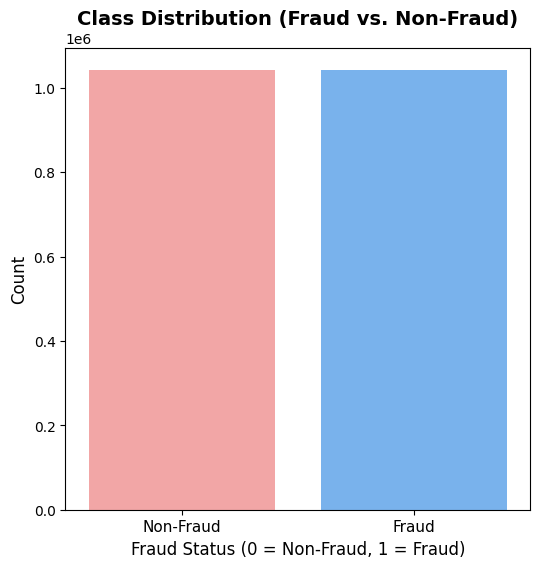

In [ ]:
# Set figure size for better visualization
plt.figure(figsize=(6, 6))

# Create a count plot for fraud vs. non-fraud distribution
sns.countplot(data=df, x='is_fraud', palette=["#FF9999", "#66B2FF"])  # Custom colors for better distinction

# Add title and labels for better understanding
plt.title("Class Distribution (Fraud vs. Non-Fraud)", fontsize=14, fontweight='bold')
plt.xlabel("Fraud Status (0 = Non-Fraud, 1 = Fraud)", fontsize=12)
plt.ylabel("Count", fontsize=12)

# Customize x-axis labels for clarity
plt.xticks(ticks=[0, 1], labels=["Non-Fraud", "Fraud"], fontsize=11)

# Remove unnecessary legend to avoid redundancy
plt.show()

<Figure size 1200x800 with 0 Axes>

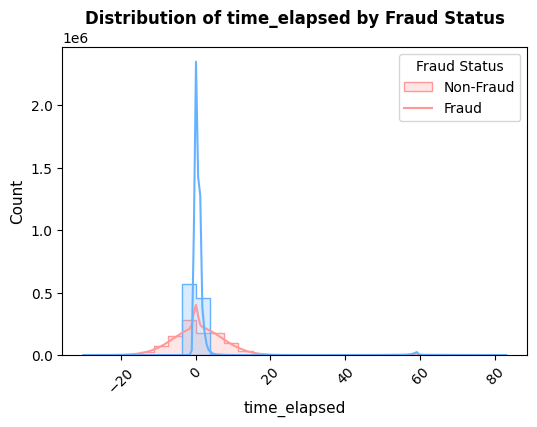

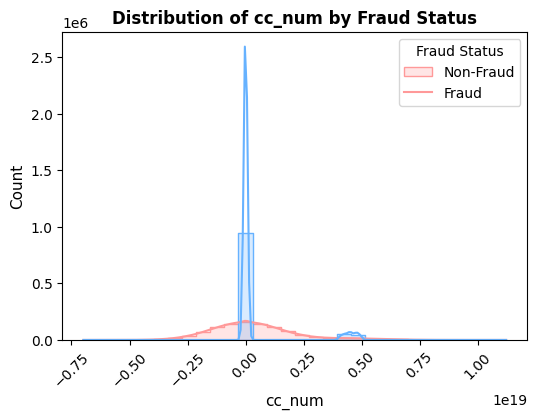

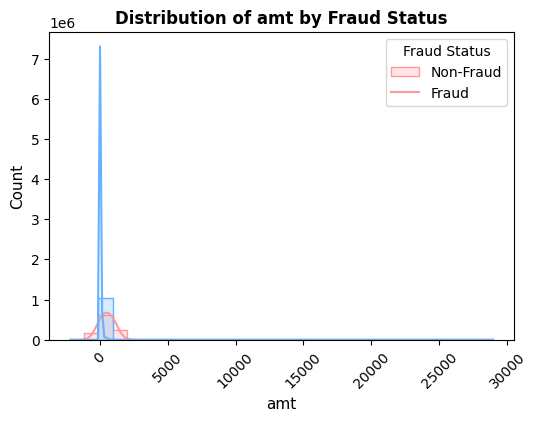

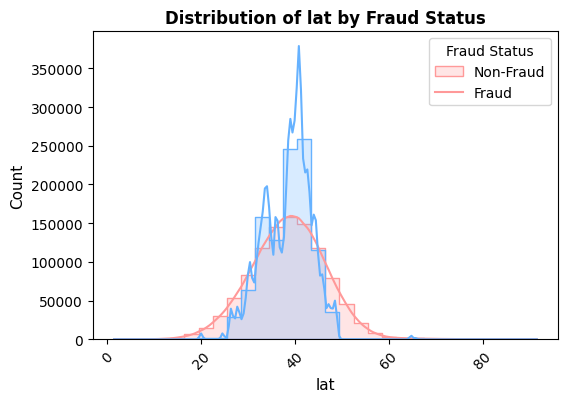

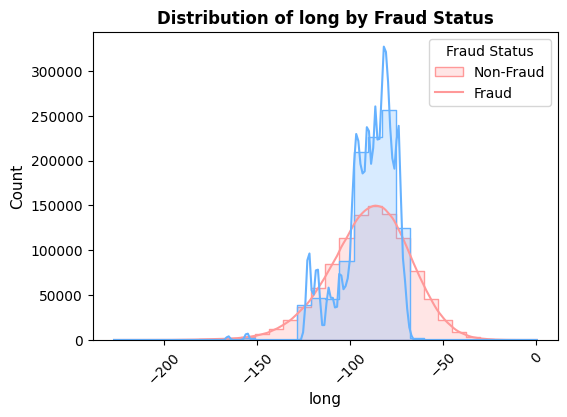

In [ ]:
# Define figure size
plt.figure(figsize=(12, 8))

# Loop through all columns except "is_fraud"
for column in df.columns:
    if column != "is_fraud":
        plt.figure(figsize=(6, 4))  # Set individual plot size

        # Check if the column is categorical or numerical
        if df[column].dtype == 'object' or df[column].nunique() < 10:  # Categorical or low-cardinality numeric
            sns.countplot(data=df, x=column, hue="is_fraud", palette=["#66B2FF", "#FF9999"])
        else:  # Numerical columns
            sns.histplot(data=df, x=column, hue="is_fraud", element="step", palette=["#66B2FF", "#FF9999"], bins=30, kde=True)

        # Set titles and labels
        plt.title(f"Distribution of {column} by Fraud Status", fontsize=12, fontweight='bold')
        plt.xlabel(column, fontsize=11)
        plt.ylabel("Count", fontsize=11)
        plt.legend(title="Fraud Status", labels=["Non-Fraud", "Fraud"])
        plt.xticks(rotation=45)  # Rotate labels for better readability if necessary
        plt.show()


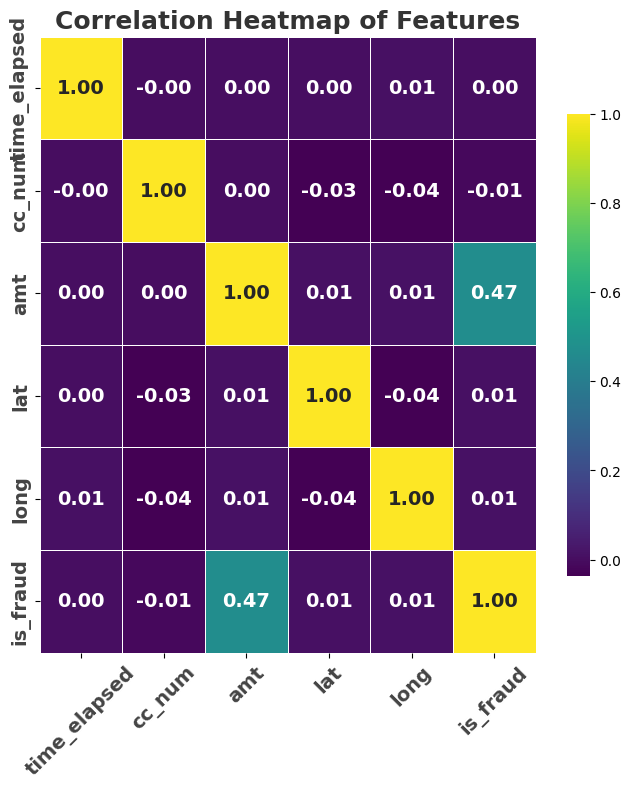

In [ ]:
# Set figure size for better readability
plt.figure(figsize=(8, 8))

# Compute the correlation matrix
corr_matrix = df.corr()

# Create the heatmap with a different color scheme
sns.heatmap(
    corr_matrix,
    cmap="viridis",  # Changed color scheme to 'viridis' for better contrast
    annot=True,
    fmt=".2f",
    annot_kws={"size": 14, "weight": "bold"},  # Adjust font size and weight for annotations
    linewidths=0.5,  # Add gridlines between cells for better separation
    linecolor="white",  # Grid color
    cbar_kws={"shrink": 0.75}  # Adjust color bar size
)

# Set title and labels
plt.title("Correlation Heatmap of Features", fontsize=18, fontweight="bold", color="#333333")  # Darker title color
plt.xticks(fontsize=14, fontweight='bold', rotation=45, color="#444444")  # Rotate x-axis labels for clarity
plt.yticks(fontsize=14, fontweight='bold', color="#444444")

# Show the plot
plt.show()


In [13]:
# Separating features (X) and target variable (y)
X = df.drop(columns=['is_fraud'])  # Drop the target column to keep only predictor features
y = df['is_fraud']  # Target variable containing fraud labels (0 = Non-Fraud, 1 = Fraud)



In [14]:
X

,time_elapsed,cc_num,amt,lat,long
0,1,4.158950e+15,3.340000,40.430800,-79.920500
1,1,4.797300e+18,16.540000,38.893800,-86.524600
2,1,4.586810e+15,29.840000,32.548600,-80.307000
3,1,4.956830e+18,101.560000,40.674700,-74.223900
4,2,4.561550e+12,3.590000,34.988900,-106.061000
...,...,...,...,...,...
2085133,4,-2.124232e+18,153.984941,38.734121,-105.612185
2085134,13,1.623557e+18,897.472037,31.135096,-76.789361
2085135,11,-8.426380e+17,1301.453019,47.524165,-31.288224
2085136,9,2.692801e+18,311.180351,47.411219,-50.518979


In [15]:
X.shape

(2085138, 5)

In [16]:
y.shape

(2085138,)

In [17]:
# Split dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.25, random_state=42, stratify=y
)

In [18]:
# Initialize the StandardScaler for normalizing continuous features
scaler = StandardScaler()

# Fit the scaler on the training set and transform both training and test sets
X_train = scaler.fit_transform(X_train)  # Fit and transform training data
X_test = scaler.transform(X_test)  # Only transform test data to prevent data leakage

# Display confirmation message
print("Feature scaling applied using StandardScaler.")

Feature scaling applied using StandardScaler.



==================== SGD Classifier ====================
Training Accuracy: 0.8004
Test Accuracy:     0.8005
Precision:         0.9737
Recall:            0.6177
F1-score:          0.7559

Classification Report:
              precision    recall  f1-score   support

           0       0.72      0.98      0.83    260643
           1       0.97      0.62      0.76    260642

    accuracy                           0.80    521285
   macro avg       0.85      0.80      0.79    521285
weighted avg       0.85      0.80      0.79    521285



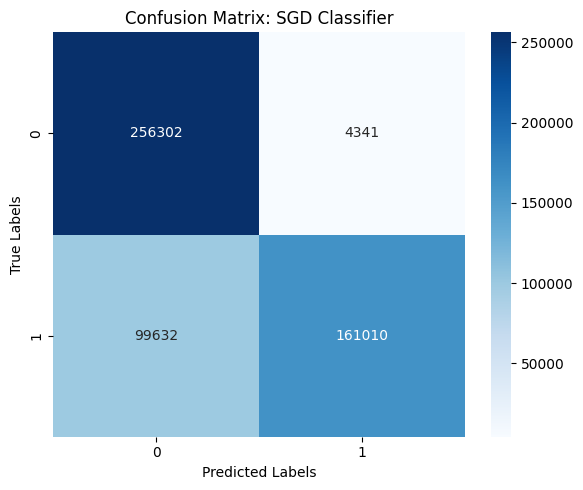


==================== K-Nearest Neighbors ====================
Training Accuracy: 0.9932
Test Accuracy:     0.9908
Precision:         0.9962
Recall:            0.9854
F1-score:          0.9908

Classification Report:
              precision    recall  f1-score   support

           0       0.99      1.00      0.99    260643
           1       1.00      0.99      0.99    260642

    accuracy                           0.99    521285
   macro avg       0.99      0.99      0.99    521285
weighted avg       0.99      0.99      0.99    521285



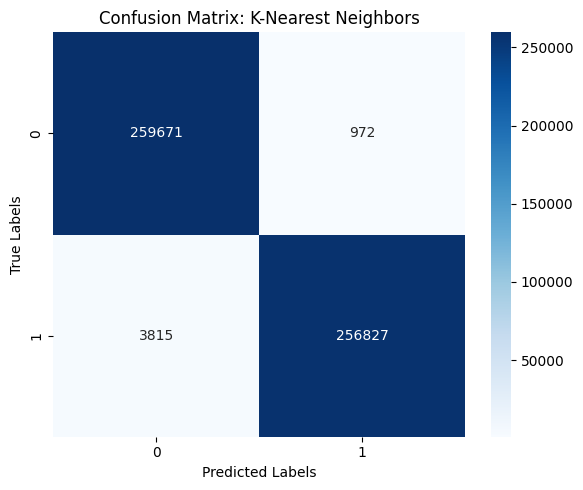

In [25]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import SGDClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import (
    accuracy_score,
    precision_score,
    recall_score,
    f1_score,
    classification_report,
    confusion_matrix
)
from sklearn import metrics  # Optional, can be omitted since we import individual functions

# Define models
models = {
    "SGD Classifier": SGDClassifier(),
    "K-Nearest Neighbors": KNeighborsClassifier(),
}

# Train and evaluate models
for name, model in models.items():
    print(f"\n{'='*20} {name} {'='*20}")

    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    # Calculate metrics
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, zero_division=0)
    recall = recall_score(y_test, y_pred, zero_division=0)
    f1 = f1_score(y_test, y_pred, zero_division=0)

    # Print metrics
    print(f"Training Accuracy: {model.score(X_train, y_train):.4f}")
    print(f"Test Accuracy:     {accuracy:.4f}")
    print(f"Precision:         {precision:.4f}")
    print(f"Recall:            {recall:.4f}")
    print(f"F1-score:          {f1:.4f}")
    print("\nClassification Report:")
    print(classification_report(y_test, y_pred, zero_division=0))

    # Plot confusion matrix
    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(6, 5))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
    plt.title(f"Confusion Matrix: {name}")
    plt.xlabel("Predicted Labels")
    plt.ylabel("True Labels")
    plt.tight_layout()
    plt.show()


# **LTSM Model**


==================== LSTM Neural Network ====================


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/20
48871/48871 ━━━━━━━━━━━━━━━━━━━━ 237s 5ms/step - accuracy: 0.9710 - loss: 0.0851 - val_accuracy: 0.9941 - val_loss: 0.0196
Epoch 2/20
48871/48871 ━━━━━━━━━━━━━━━━━━━━ 264s 5ms/step - accuracy: 0.9936 - loss: 0.0214 - val_accuracy: 0.9946 - val_loss: 0.0180
Epoch 3/20
48871/48871 ━━━━━━━━━━━━━━━━━━━━ 273s 5ms/step - accuracy: 0.9941 - loss: 0.0198 - val_accuracy: 0.9944 - val_loss: 0.0182
Epoch 4/20
48871/48871 ━━━━━━━━━━━━━━━━━━━━ 237s 5ms/step - accuracy: 0.9943 - loss: 0.0189 - val_accuracy: 0.9946 - val_loss: 0.0179
Epoch 5/20
48871/48871 ━━━━━━━━━━━━━━━━━━━━ 236s 4ms/step - accuracy: 0.9945 - loss: 0.0185 - val_accuracy: 0.9948 - val_loss: 0.0173
Epoch 6/20
48871/48871 ━━━━━━━━━━━━━━━━━━━━ 224s 5ms/step - accuracy: 0.9947 - loss: 0.0178 - val_accuracy: 0.9950 - val_loss: 0.0164
Epoch 7/20
48871/48871 ━━━━━━━━━━━━━━━━━━━━ 277s 5ms/step - accuracy: 0.9947 - loss: 0.0179 - val_accuracy: 0.9948 - val_loss: 0.0169
Epoch 8/20
48871/48871 ━━━━━━━━━━━━━━━━━━━━ 253s 5ms/step - ac

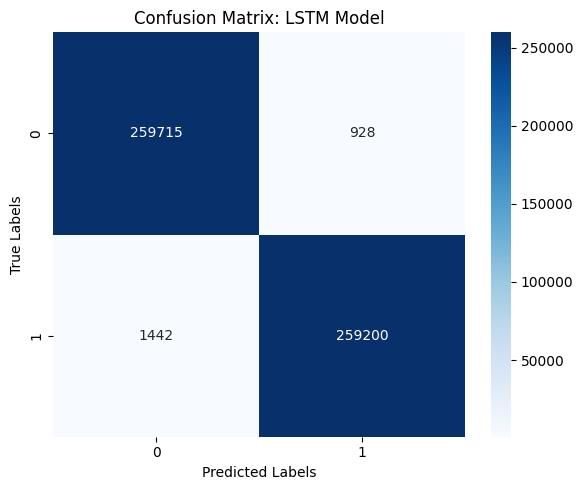

In [26]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# ======= LSTM Model =======
print(f"\n{'='*20} LSTM Neural Network {'='*20}")

# Step 1: Reshape Data for LSTM (LSTM requires 3D input: [samples, timesteps, features])
X_train_lstm = np.reshape(X_train, (X_train.shape[0], 1, X_train.shape[1]))
X_test_lstm = np.reshape(X_test, (X_test.shape[0], 1, X_test.shape[1]))

# Step 2: Build LSTM Model
model = Sequential([
    LSTM(units=64, return_sequences=True, input_shape=(1, X_train.shape[1])),
    Dropout(0.2),
    LSTM(units=32, return_sequences=False),
    Dropout(0.2),
    Dense(units=16, activation='relu'),
    Dense(units=1, activation='sigmoid')  # Binary classification
])

# Step 3: Compile the Model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Step 4: Train the Model
history = model.fit(
    X_train_lstm, y_train,
    epochs=20,
    batch_size=32,
    validation_data=(X_test_lstm, y_test),
    verbose=1
)

# Step 5: Make Predictions
y_pred_prob = model.predict(X_test_lstm)
y_pred = (y_pred_prob > 0.5).astype(int)

# Step 6: Evaluate Metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, zero_division=0)
recall = recall_score(y_test, y_pred, zero_division=0)
f1 = f1_score(y_test, y_pred, zero_division=0)

# Step 7: Print Results
train_loss, train_accuracy = model.evaluate(X_train_lstm, y_train, verbose=0)
print(f"Training Accuracy: {train_accuracy:.4f}")
print(f"Test Accuracy:     {accuracy:.4f}")
print(f"Precision:         {precision:.4f}")
print(f"Recall:            {recall:.4f}")
print(f"F1-score:          {f1:.4f}")

print("\nClassification Report:")
print(classification_report(y_test, y_pred, zero_division=0))

# Step 8: Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix: LSTM Model")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.tight_layout()
plt.show()
